# Importando libs importantes

In [14]:
from sklearn import datasets

from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy
from sklearn.model_selection import train_test_split
import pandas as pd

## Selecionando base de dados

In [15]:
dataset = datasets.load_wine()

dados = dataset.data
rotulos = dataset.target

df = pd.DataFrame(dados, columns=dataset.feature_names)
df['target'] = rotulos
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


<Axes: >

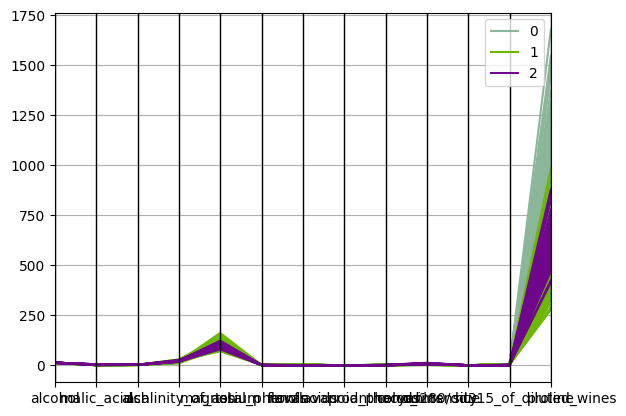

In [16]:
from pandas.plotting import parallel_coordinates

parallel_coordinates(df, class_column='target')

In [21]:
import pandas as pd
from sklearn import preprocessing

df = pd.DataFrame(dados, columns=dataset.feature_names)

x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x)

df = pd.DataFrame(x_scaled)
df['target'] = rotulos
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446,0.938202
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613,0.775035
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702,0.000000
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097,1.000000
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


<Axes: >

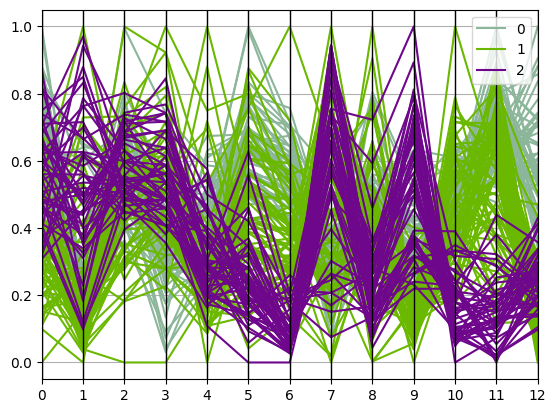

In [22]:
from pandas.plotting import parallel_coordinates

parallel_coordinates(df, class_column='target')

## Selecionando classificador

In [ ]:
clf_svm = SVC()
clf_rf = RandomForestClassifier()
clf_pt = Perceptron()

## Avaliando o classificadores

In [ ]:
from sklearn.model_selection import cross_validate

scoring_list = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

scores_svm = cross_validate(clf_svm, dados, rotulos, cv=4, scoring=scoring_list)
scores_rf = cross_validate(clf_rf, dados, rotulos, cv=4, scoring=scoring_list)
scores_pt = cross_validate(clf_pt, dados, rotulos, cv=4, scoring=scoring_list)

avg_scores_svm = []
avg_scores_rf = []
avg_scores_pt = []

for score in scoring_list:
    avg_scores_svm.append(scores_svm['test_'+score].mean())
    avg_scores_rf.append(scores_rf['test_'+score].mean())
    avg_scores_pt.append(scores_pt['test_'+score].mean())

print('SVM - ', avg_scores_svm)
print('RF - ', avg_scores_rf)
print('Perceptron - ', avg_scores_pt)

/home/periclesmiranda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM -  [0.663131313131313, 0.6073490972678279, 0.6338235294117647, 0.6127715376539977]
RF -  [0.9722222222222222, 0.9718470187220187, 0.975925925925926, 0.9724892877896215]
Perceptron -  [0.477020202020202, 0.39858690086600324, 0.47129629629629627, 0.3825753277165133]


/home/periclesmiranda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/periclesmiranda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/periclesmiranda/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Comparando classificadores

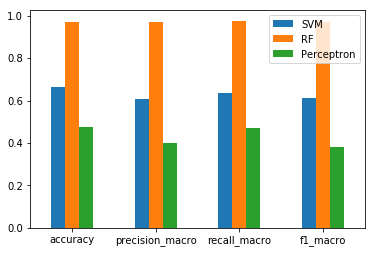

In [ ]:
df = pd.DataFrame({'SVM': avg_scores_svm,
                   'RF': avg_scores_rf,
                   'Perceptron': avg_scores_pt}, index=scoring_list)
ax = df.plot.bar(rot=0)